In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [8]:
account_df = pd.read_csv('../Cubes/Data/Account.csv')
client_df = pd.read_csv('../Cubes/Data/Client.csv')
date_df = pd.read_csv('../Cubes/Data/Date.csv')
district_df = pd.read_csv('../Cubes/Data/District.csv')
type_df = pd.read_csv('../Cubes/Data/Type.csv')
operations_df = pd.read_csv('../Cubes/Data/Operations.csv')

In [9]:
operations_df.head()

operation_id  type_id  date_id  account_key  receiver  client_id  \
0             1        1      258         4491         1      13845   
1             2        1      343         4174         1       8598   
2             3        1      350         4315         1      11126   
3             4        1      355         4338         1      11372   
4             5        1      375         2367         1       3001   

   district_id  client_district_id  amount  amount_avg  quantity  
0           15                  15   52788       52788         1  
1           64                  46   47016       47016         1  
2            1                   1   38148       38148         1  
3           11                  11   86616       86616         1  
4            1                   1   24516       24516         1

In [10]:
type_df.head()

type_id      type transaction_type transaction_op k_symbol  loan_duration  \
0        1  Prestamo              NaN            NaN      NaN           12.0   
1        2  Prestamo              NaN            NaN      NaN           12.0   
2        3  Prestamo              NaN            NaN      NaN           12.0   
3        4  Prestamo              NaN            NaN      NaN           12.0   
4        5  Prestamo              NaN            NaN      NaN           24.0   

  loan_status  
0           A  
1           B  
2           C  
3           D  
4           A

In [11]:
account_df.head()

account_key  account_id  district_id bank  extraction_freq  start_date  \
0            1          -1         -1.0   BI              NaN  1990-01-01   
1            2           1         18.0   BI  Emision Mensual  1990-01-01   
2            3           2          1.0   BI  Emision Mensual  1990-01-01   
3            4           3          5.0   BI  Emision Mensual  1990-01-01   
4            5           4         12.0   BI  Emision Mensual  1990-01-01   

     end_date created_date  
0  2012-05-21   1990-01-01  
1  2012-05-21   1995-03-24  
2  2012-05-21   1993-02-26  
3  2012-05-21   1997-07-07  
4  2012-05-21   1996-02-21

In [12]:
date_df.head()

date_id  day_val  month_val  year_val  semester_val
0        1        1          1      1993             1
1        2        2          1      1993             1
2        3        3          1      1993             1
3        4        4          1      1993             1
4        5        5          1      1993             1

In [13]:
district_df.head()

district_id  unemployment_rate_95  unemployment_rate_96  \
0            1                  0.29                  0.43   
1           10                  0.56                  0.54   
2           11                  0.45                  0.59   
3           12                  3.83                  4.31   
4           13                  2.77                  3.26   

   entrepreneur_num1000    end_date  crimes_num_95  crimes_num_96  start_date  \
0                   167  2021-01-21          85677          99107  1990-01-01   
1                   141  2021-01-21           3810           4316  1990-01-01   
2                   154  2021-01-21           3475           3529  1990-01-01   
3                   137  2021-01-21           3804           3868  1990-01-01   
4                   123  2021-01-21           1597           1875  1990-01-01   

    district_name  inhabitants_num  municipality_num499  \
0     Hl.m. Praha          1204953                    0   
1  Praha - vychod            92084                   55   
2   Praha - zapad            75637                   35   
3         Pribram           107870                   84   
4        Rakovnik            53921                   61   

   municipality_num499_1999  municipality_num2000_9999  municipality_num10000  \
0                         0                          0                      1   
1                        29                          4                      3   
2                        36                          9                      0   
3                        29                          6                      1   
4                        22                          1                      1   

   city_num           region  urban_inhabitants_proportion  medium_salary  
0         1           Prague                         100.0          12541  
1         5  central Bohemia                          46.7          10124  
2         7  central Bohemia                          36.5           9622  
3         6  central Bohemia                          58.0           8754  
4         2  central Bohemia                          41.3           8598

In [14]:
client_df.head()

client_id  district_id  gender  age   age_levels  card_num card_type  \
0          1           18  FEMALE   29        ADULT       NaN       NaN   
1          2            1    MALE   54  MIDDLE AGED       NaN       NaN   
2          3            1  FEMALE   59  MIDDLE AGED       NaN       NaN   
3          4            5    MALE   43  MIDDLE AGED       NaN       NaN   
4          5            5  FEMALE   39  MIDDLE AGED       NaN       NaN   

  card_emission_date account_owner  
0                NaN         OWNER  
1                NaN         OWNER  
2                NaN     DISPONENT  
3                NaN         OWNER  
4                NaN     DISPONENT

In [15]:
orders_df.head()

NameError: name 'orders_df' is not defined

In [16]:
merged_data = operations_df.merge(type_df,on='type_id')
merged_data = merged_data[merged_data['type']=='Prestamo']
merged_data

operation_id  type_id  date_id  account_key  receiver  client_id  \
0               1        1      258         4491         1      13845   
1               2        1      343         4174         1       8598   
2               3        1      350         4315         1      11126   
3               4        1      355         4338         1      11372   
4               5        1      375         2367         1       3001   
..            ...      ...      ...          ...       ...        ...   
677           678       20     1751         4248         1       9987   
678           679       20     1770         3528         1       4474   
679           680       20     1777         2221         1       2823   
680           681       20     1795         4461         1      13346   
681           682       20     2113           37         1         45   

     district_id  client_district_id  amount  amount_avg  quantity      type  \
0             15                  15   52788       52788         1  Prestamo   
1             64                  46   47016       47016         1  Prestamo   
2              1                   1   38148       38148         1  Prestamo   
3             11                  11   86616       86616         1  Prestamo   
4              1                   1   24516       24516         1  Prestamo   
..           ...                 ...     ...         ...       ...       ...   
677           73                  73  260400      260400         1  Prestamo   
678            3                   3  460980      460980         1  Prestamo   
679           70                  70  541200      541200         1  Prestamo   
680           50                  50  385560      385560         1  Prestamo   
681           20                  20  318480      318480         1  Prestamo   

    transaction_type transaction_op k_symbol  loan_duration loan_status  
0                NaN            NaN      NaN           12.0           A  
1                NaN            NaN      NaN           12.0           A  
2                NaN            NaN      NaN           12.0           A  
3                NaN            NaN      NaN           12.0           A  
4                NaN            NaN      NaN           12.0           A  
..               ...            ...      ...            ...         ...  
677              NaN            NaN      NaN           60.0           D  
678              NaN            NaN      NaN           60.0           D  
679              NaN            NaN      NaN           60.0           D  
680              NaN            NaN      NaN           60.0           D  
681              NaN            NaN      NaN           60.0           D  

[682 rows x 17 columns]

In [17]:
merged_data = merged_data.merge(date_df,on='date_id')
merged_data

operation_id  type_id  date_id  account_key  receiver  client_id  \
0               1        1      258         4491         1      13845   
1               2        1      343         4174         1       8598   
2               3        1      350         4315         1      11126   
3               4        1      355         4338         1      11372   
4               5        1      375         2367         1       3001   
..            ...      ...      ...          ...       ...        ...   
677           675       20     1583         3669         1       4652   
678           678       20     1751         4248         1       9987   
679           679       20     1770         3528         1       4474   
680           680       20     1777         2221         1       2823   
681           682       20     2113           37         1         45   

     district_id  client_district_id  amount  amount_avg  ...      type  \
0             15                  15   52788       52788  ...  Prestamo   
1             64                  46   47016       47016  ...  Prestamo   
2              1                   1   38148       38148  ...  Prestamo   
3             11                  11   86616       86616  ...  Prestamo   
4              1                   1   24516       24516  ...  Prestamo   
..           ...                 ...     ...         ...  ...       ...   
677           53                  53  307200      307200  ...  Prestamo   
678           73                  73  260400      260400  ...  Prestamo   
679            3                   3  460980      460980  ...  Prestamo   
680           70                  70  541200      541200  ...  Prestamo   
681           20                  20  318480      318480  ...  Prestamo   

    transaction_type transaction_op k_symbol loan_duration  loan_status  \
0                NaN            NaN      NaN          12.0            A   
1                NaN            NaN      NaN          12.0            A   
2                NaN            NaN      NaN          12.0            A   
3                NaN            NaN      NaN          12.0            A   
4                NaN            NaN      NaN          12.0            A   
..               ...            ...      ...           ...          ...   
677              NaN            NaN      NaN          60.0            D   
678              NaN            NaN      NaN          60.0            D   
679              NaN            NaN      NaN          60.0            D   
680              NaN            NaN      NaN          60.0            D   
681              NaN            NaN      NaN          60.0            D   

    day_val  month_val  year_val  semester_val  
0        15          9      1993             2  
1         9         12      1993             2  
2        16         12      1993             2  
3        21         12      1993             2  
4        10          1      1994             1  
..      ...        ...       ...           ...  
677       2          5      1997             1  
678      17         10      1997             2  
679       5         11      1997             2  
680      12         11      1997             2  
681      14         10      1998             2  

[682 rows x 21 columns]

In [18]:
merged_data = merged_data.merge(account_df,on='account_key')
merged_data

operation_id  type_id  date_id  account_key  receiver  client_id  \
0               1        1      258         4491         1      13845   
1               2        1      343         4174         1       8598   
2               3        1      350         4315         1      11126   
3               4        1      355         4338         1      11372   
4               5        1      375         2367         1       3001   
..            ...      ...      ...          ...       ...        ...   
677           675       20     1583         3669         1       4652   
678           678       20     1751         4248         1       9987   
679           679       20     1770         3528         1       4474   
680           680       20     1777         2221         1       2823   
681           682       20     2113           37         1         45   

     district_id_x  client_district_id  amount  amount_avg  ...  month_val  \
0               15                  15   52788       52788  ...          9   
1               64                  46   47016       47016  ...         12   
2                1                   1   38148       38148  ...         12   
3               11                  11   86616       86616  ...         12   
4                1                   1   24516       24516  ...          1   
..             ...                 ...     ...         ...  ...        ...   
677             53                  53  307200      307200  ...          5   
678             73                  73  260400      260400  ...         10   
679              3                   3  460980      460980  ...         11   
680             70                  70  541200      541200  ...         11   
681             20                  20  318480      318480  ...         10   

    year_val semester_val account_id district_id_y  bank  \
0       1993            2      11265          15.0    BI   
1       1993            2       7123          64.0    BI   
2       1993            2       9034           1.0    BI   
3       1993            2       9236          11.0    BI   
4       1994            1       2486           1.0    BI   
..       ...          ...        ...           ...   ...   
677     1997            1       3859          53.0    BI   
678     1997            2       8085          73.0    BI   
679     1997            2       3711           3.0    BI   
680     1997            2       2335          70.0    BI   
681     1998            2         37          20.0    BI   

              extraction_freq  start_date    end_date  created_date  
0             Emision Mensual  1990-01-01  2012-05-21    1993-01-14  
1    Emision Tras Transaccion  1990-01-01  2012-05-21    1993-04-14  
2             Emision Mensual  1990-01-01  2012-05-21    1993-06-28  
3             Emision Mensual  1990-01-01  2012-05-21    1993-08-18  
4             Emision Mensual  1990-01-01  2012-05-21    1993-02-27  
..                        ...         ...         ...           ...  
677           Emision Mensual  1990-01-01  2012-05-21    1996-04-23  
678           Emision Mensual  1990-01-01  2012-05-21    1996-04-08  
679           Emision Mensual  1990-01-01  2012-05-21    1997-05-08  
680           Emision Mensual  1990-01-01  2012-05-21    1996-04-04  
681           Emision Mensual  1990-01-01  2012-05-21    1997-08-18  

[682 rows x 28 columns]

In [19]:
merged_data = merged_data.merge(district_df,left_on='district_id_x',right_on='district_id')
merged_data

operation_id  type_id  date_id  account_key  receiver  client_id  \
0               1        1      258         4491         1      13845   
1              37        1      960         3990         1       5826   
2              46        1     1317         4065         1       6753   
3             517       15     2078         4034         1       6383   
4             213        7     1584          299         1        383   
..            ...      ...      ...          ...       ...        ...   
677           467       15     1592         2236         1       2841   
678           486       15     1728         4147         1       8089   
679           526       16      805         1189         1       1505   
680           607       19     1553         4470         1      13468   
681           649       19     1988         4467         1      13417   

     district_id_x  client_district_id  amount  amount_avg  ...  \
0               15                  15   52788       52788  ...   
1               15                  15   21396       21396  ...   
2               15                  15   44376       44376  ...   
3               15                  15  170832      170832  ...   
4               15                  15   66840       66840  ...   
..             ...                 ...     ...         ...  ...   
677             18                  18  159744      159744  ...   
678             35                  35  127200      127200  ...   
679             25                  65   99696       99696  ...   
680             25                  25   18720       18720  ...   
681             25                  25  152460      152460  ...   

         district_name inhabitants_num municipality_num499  \
0        Cesky Krumlov           58796                  22   
1        Cesky Krumlov           58796                  22   
2        Cesky Krumlov           58796                  22   
3        Cesky Krumlov           58796                  22   
4        Cesky Krumlov           58796                  22   
..                 ...             ...                 ...   
677              Pisek           70699                  60   
678  Jablonec n. Nisou           88768                  10   
679            Klatovy           88757                  60   
680            Klatovy           88757                  60   
681            Klatovy           88757                  60   

    municipality_num499_1999 municipality_num2000_9999  municipality_num10000  \
0                         16                         7                      1   
1                         16                         7                      1   
2                         16                         7                      1   
3                         16                         7                      1   
4                         16                         7                      1   
..                       ...                       ...                    ...   
677                       13                         2                      1   
678                       18                         5                      1   
679                       33                         3                      2   
680                       33                         3                      2   
681                       33                         3                      2   

    city_num         region  urban_inhabitants_proportion  medium_salary  
0          5  south Bohemia                          51.9           9045  
1          5  south Bohemia                          51.9           9045  
2          5  south Bohemia                          51.9           9045  
3          5  south Bohemia                          51.9           9045  
4          5  south Bohemia                          51.9           9045  
..       ...            ...                           ...            ...  
677        4  south Bohemia                          65.3           8968  
678  

In [20]:
merged_data['date_loan']=merged_data[['year_val','month_val','day_val']].apply(lambda x:'-'.join(x.values.astype(str)),axis='columns')
merged_data['date_loan'] = pd.to_datetime(merged_data['date_loan'])

In [21]:
merged_data['date_acc'] = pd.to_datetime(merged_data['created_date'])

In [22]:
merged_data['days_between'] = (merged_data['date_loan']-merged_data['date_acc']).dt.days

In [23]:
merged_data['inhabitants_num']

0      58796
1      58796
2      58796
3      58796
4      58796
       ...  
677    70699
678    88768
679    88757
680    88757
681    88757
Name: inhabitants_num, Length: 682, dtype: int64

In [24]:
merged_data['medium_salary']

0      9045
1      9045
2      9045
3      9045
4      9045
       ... 
677    8968
678    8867
679    8554
680    8554
681    8554
Name: medium_salary, Length: 682, dtype: int64

In [25]:
merged_data['average_unemployment_rate'] = merged_data[['unemployment_rate_95','unemployment_rate_96']].mean(axis=1)

In [26]:
merged_data['entrepreneur_rate'] = merged_data['entrepreneur_num1000']

In [27]:
merged_data['average_crime_rate'] = merged_data[['crimes_num_95','crimes_num_96']].mean(axis=1) / merged_data['inhabitants_num']

In [28]:
merged_data['default'] = (merged_data['loan_status'] == 'B') | (merged_data['loan_status'] == 'D')

In [29]:
merged_data

operation_id  type_id  date_id  account_key  receiver  client_id  \
0               1        1      258         4491         1      13845   
1              37        1      960         3990         1       5826   
2              46        1     1317         4065         1       6753   
3             517       15     2078         4034         1       6383   
4             213        7     1584          299         1        383   
..            ...      ...      ...          ...       ...        ...   
677           467       15     1592         2236         1       2841   
678           486       15     1728         4147         1       8089   
679           526       16      805         1189         1       1505   
680           607       19     1553         4470         1      13468   
681           649       19     1988         4467         1      13417   

     district_id_x  client_district_id  amount  amount_avg  ...  \
0               15                  15   52788       52788  ...   
1               15                  15   21396       21396  ...   
2               15                  15   44376       44376  ...   
3               15                  15  170832      170832  ...   
4               15                  15   66840       66840  ...   
..             ...                 ...     ...         ...  ...   
677             18                  18  159744      159744  ...   
678             35                  35  127200      127200  ...   
679             25                  65   99696       99696  ...   
680             25                  25   18720       18720  ...   
681             25                  25  152460      152460  ...   

            region urban_inhabitants_proportion medium_salary  date_loan  \
0    south Bohemia                         51.9          9045 1993-09-15   
1    south Bohemia                         51.9          9045 1995-08-18   
2    south Bohemia                         51.9          9045 1996-08-09   
3    south Bohemia                         51.9          9045 1998-09-09   
4    south Bohemia                         51.9          9045 1997-05-03   
..             ...                          ...           ...        ...   
677  south Bohemia                         65.3          8968 1997-05-11   
678  north Bohemia                         80.5          8867 1997-09-24   
679   west Bohemia                         61.7          8554 1995-03-16   
680   west Bohemia                         61.7          8554 1997-04-02   
681   west Bohemia                         61.7          8554 1998-06-11   

      date_acc  days_between average_unemployment_rate  entrepreneur_rate  \
0   1993-01-14           244                     3.365                124   
1   1994-06-04           440                     3.365                124   
2   1996-02-27           164                     3.365                124   
3   1997-09-18           356                     3.365                124   
4   1996-01-26           463                     3.365                124   
..         ...           ...                       ...                ...   
677 1996-08-04           280                     3.090                131   
678 1996-06-08           473                     1.115                130   
679 1993-06-08           646                     2.575                113   
680 1996-07-29           247                     2.575                113   
681 1997-02-15           481                     2.575                113   

     average_crime_rate  default  
0              0.031669    False  
1              0.031669    False  
2              0.031669    False  
3              0.031669    False  
4              0.031669    False  
..                  ...      ...  
677            0.025814    False  
678            0.039451    False  
679            0.022759     True  
680            0.022759    False  
681            0.022759    False  

[682 rows x 53 columns]

In [30]:
#Merge con client
merged_data = merged_data.merge(client_df,on='client_id')

In [31]:
merged_data

operation_id  type_id  date_id  account_key  receiver  client_id  \
0               1        1      258         4491         1      13845   
1              37        1      960         3990         1       5826   
2              46        1     1317         4065         1       6753   
3             517       15     2078         4034         1       6383   
4             213        7     1584          299         1        383   
..            ...      ...      ...          ...       ...        ...   
677           467       15     1592         2236         1       2841   
678           486       15     1728         4147         1       8089   
679           526       16      805         1189         1       1505   
680           607       19     1553         4470         1      13468   
681           649       19     1988         4467         1      13417   

     district_id_x  client_district_id  amount  amount_avg  ...  \
0               15                  15   52788       52788  ...   
1               15                  15   21396       21396  ...   
2               15                  15   44376       44376  ...   
3               15                  15  170832      170832  ...   
4               15                  15   66840       66840  ...   
..             ...                 ...     ...         ...  ...   
677             18                  18  159744      159744  ...   
678             35                  35  127200      127200  ...   
679             25                  65   99696       99696  ...   
680             25                  25   18720       18720  ...   
681             25                  25  152460      152460  ...   

     average_crime_rate default district_id_y  gender age   age_levels  \
0              0.031669   False            15    MALE  26        ADULT   
1              0.031669   False            15    MALE  31        ADULT   
2              0.031669   False            15    MALE  37  MIDDLE AGED   
3              0.031669   False            15    MALE  29        ADULT   
4              0.031669   False            15  FEMALE  60  MIDDLE AGED   
..                  ...     ...           ...     ...  ..          ...   
677            0.025814   False            18  FEMALE  26        ADULT   
678            0.039451   False            35    MALE  34        ADULT   
679            0.022759    True            65  FEMALE  28        ADULT   
680            0.022759   False            25    MALE  39  MIDDLE AGED   
681            0.022759   False            25  FEMALE  48  MIDDLE AGED   

    card_num  card_type  card_emission_date  account_owner  
0        NaN        NaN                 NaN          OWNER  
1        NaN        NaN                 NaN          OWNER  
2      854.0    classic          1996-10-07          OWNER  
3        NaN        NaN                 NaN          OWNER  
4        NaN        NaN                 NaN          OWNER  
..       ...        ...                 ...            ...  
677    446.0    classic          1998-06-04          OWNER  
678      NaN        NaN                 NaN          OWNER  
679      NaN        NaN                 NaN          OWNER  
680   1220.0    classic          1997-08-08          OWNER  
681      NaN        NaN                 NaN          OWNER  

[682 rows x 61 columns]

In [32]:
merged_data['card_type']=merged_data['card_type'].fillna('No')

In [33]:
merged_data.set_index('account_key',inplace=True)

In [34]:
merged_data['loan_duration'] = merged_data['loan_duration'].astype(int)

In [35]:
#me quedo con las features que arme y algunas mas para probar el modelo, aca se podrian agregar mas features despues
df_ml = merged_data[['amount','loan_duration','days_between','inhabitants_num','medium_salary','average_unemployment_rate',
                     'entrepreneur_rate','average_crime_rate','age','card_type','gender','default']]

In [36]:
df_ml.sample(10)

amount  loan_duration  days_between  inhabitants_num  \
account_key                                                         
4498         280440             60           620           387570   
4020          22356             36           314            95616   
4105         407952             48           478            51428   
2142          72504             24           317           122603   
4064         221880             60           311            81344   
4259          97980             60           623            45714   
3714         133848             24           697           114006   
4461         385560             60           424           102609   
4422          88704             48           670            87419   
4414         113436             36           384           105606   

             medium_salary  average_unemployment_rate  entrepreneur_rate  \
account_key                                                                
4498                  9897                      1.780                140   
4020                  9307                      4.140                118   
4105                  8402                      3.555                120   
2142                  8991                      1.700                128   
4064                  8899                      3.680                149   
4259                  8843                      3.210                113   
3714                  9065                      4.925                123   
4461                  8187                      5.140                 94   
4422                  8624                      2.225                102   
4414                  8254                      3.275                 97   

             average_crime_rate  age card_type  gender  default  
account_key                                                      
4498                   0.048271   47        No  FEMALE    False  
4020                   0.029577   59        No    MALE    False  
4105                   0.020397   25        No  FEMALE     True  
2142                   0.042703   49        No  FEMALE    False  
4064                   0.033647   56        No  FEMALE    False  
4259                   0.018659   19        No  FEMALE    False  
3714                   0.036459   39        No  FEMALE    False  
4461                   0.020744   43        No    MALE     True  
4422                   0.034758   39        No  FEMALE    False  
4414                   0.021263   43   classic    MALE    False

## Correlations

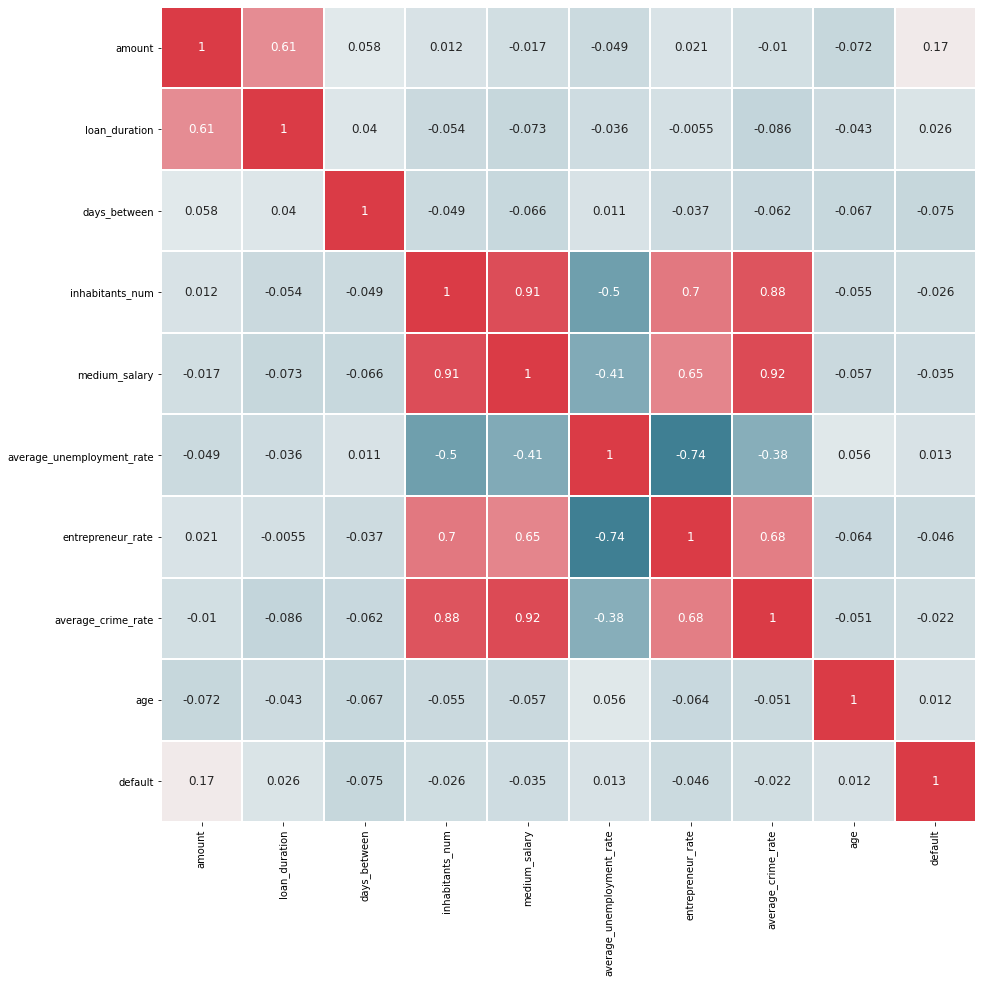

In [37]:
#Quick correlations check between continuous variables

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(
        df_ml.corr(), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar=False,
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.show()

## Transformations
* Scaling numeric variables using MinMaxScaler
* OneHot encoding categorical variables


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [39]:
num_cols = df_ml.columns[:-3]
cat_cols = df_ml.columns[-3:]

In [40]:
num_cols

Index(['amount', 'loan_duration', 'days_between', 'inhabitants_num',
       'medium_salary', 'average_unemployment_rate', 'entrepreneur_rate',
       'average_crime_rate', 'age'],
      dtype='object')

In [41]:
cat_cols

Index(['card_type', 'gender', 'default'], dtype='object')

In [42]:
col_trans = ColumnTransformer([
    ('num', MinMaxScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

In [43]:
df_transformed = col_trans.fit_transform(df_ml)
X = df_transformed[:, :-1]
y = df_transformed[:, -1]

## Modeling

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [45]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

In [46]:
# See the inital model performance
clf = RandomForestClassifier(random_state=10)
print('Acc:', cross_val_score(clf, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy').mean())
print('F1:', cross_val_score(clf, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='f1').mean())
print('ROC AUC:', cross_val_score(clf, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='roc_auc').mean())

Acc: 0.8826754385964912
F1: 0.06666666666666668
ROC AUC: 0.5565001273236567


In [47]:
## Fine tuning
## buscando los mejores parametros, basandonos en score F1

In [48]:

params = {
    'n_estimators': [10, 50, 100, 200,500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [49]:
clf = GridSearchCV(RandomForestClassifier(random_state=10), param_grid=params, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=10), scoring='f1')
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='f1')

In [50]:

print(clf.best_params_)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


In [51]:
clf.best_score_

0.12124542124542126

## Train with the best params


In [52]:
clf = RandomForestClassifier(n_estimators=10,
                             max_depth=10,
                             min_samples_split=5,
                             min_samples_leaf=2,
                             random_state=11)

In [53]:

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=10, random_state=11)

## Performance on training set

In [54]:
y_train_pred = clf.predict(X_train)
y_train_proba = clf.predict_proba(X_train)

In [55]:
print('Train Acc:', accuracy_score(y_train, y_train_pred))
print('Train F1:', f1_score(y_train, y_train_pred))
print('Train ROC AUC:', roc_auc_score(y_train, y_train_proba[:, 1]))

Train Acc: 0.9371069182389937
Train F1: 0.6052631578947368
Train ROC AUC: 0.9866945532217871


In [56]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Good', 'Bad'], 
                      cmap=plt.cm.Blues, ax=ax,values_format='.2f')
ax.set_title('Confusion Matrix on Training Set')
plt.show()

## Performance on test set

In [57]:
y_test_pred = clf.predict(X_test)
y_test_proba = clf.predict_proba(X_test)

In [58]:
print('test Acc:', accuracy_score(y_test, y_test_pred))
print('test F1:', f1_score(y_test, y_test_pred))
print('test ROC AUC:', roc_auc_score(y_test, y_test_proba[:, 1]))

test Acc: 0.8829268292682927
test F1: 0.0
test ROC AUC: 0.5353559483994267


In [59]:

# Confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Good', 'Bad'], 
                      cmap=plt.cm.Blues, ax=ax,values_format='.2f')
ax.set_title('Confusion Matrix on Test Set')
plt.show()

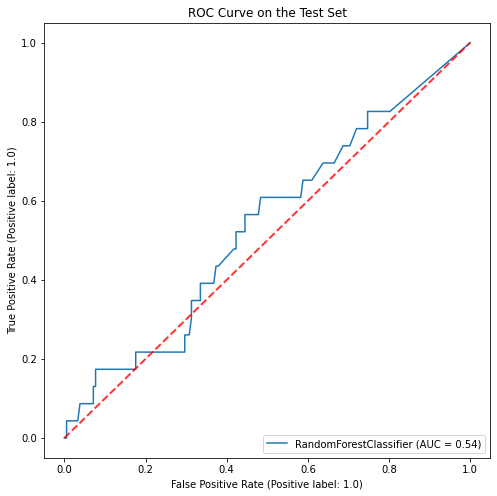

In [60]:
# ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
plot_roc_curve(clf, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
ax.set_title('ROC Curve on the Test Set')
plt.show()

In [62]:
#Clustering

In [63]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

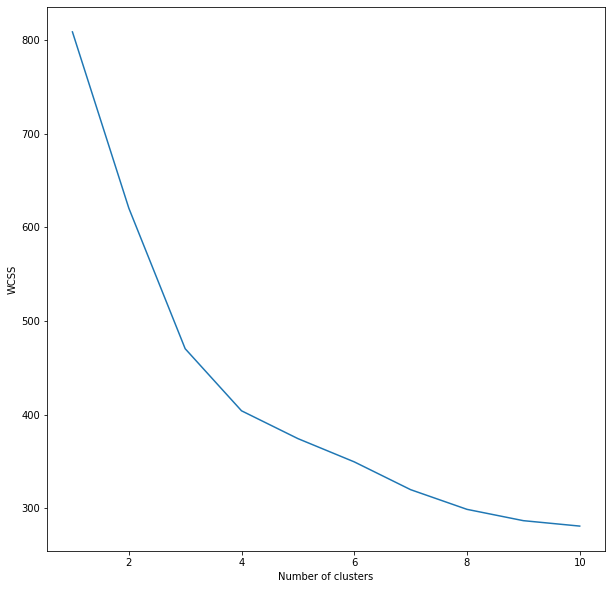

In [64]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(X)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
pca = PCA(2)
data = pca.fit_transform(X)

In [81]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

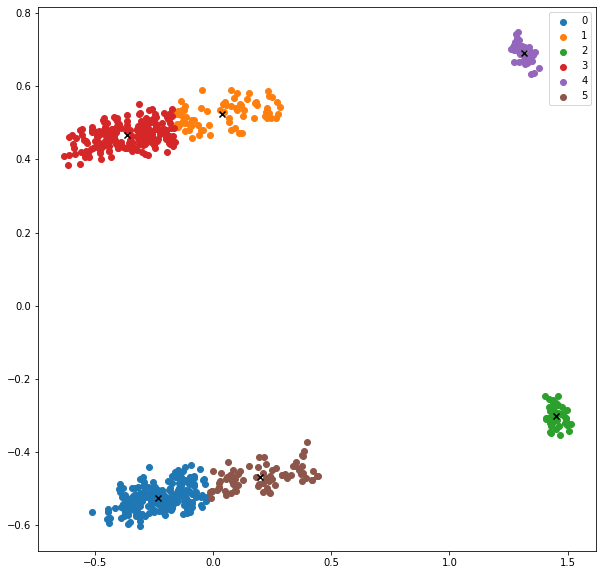

In [83]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 6, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

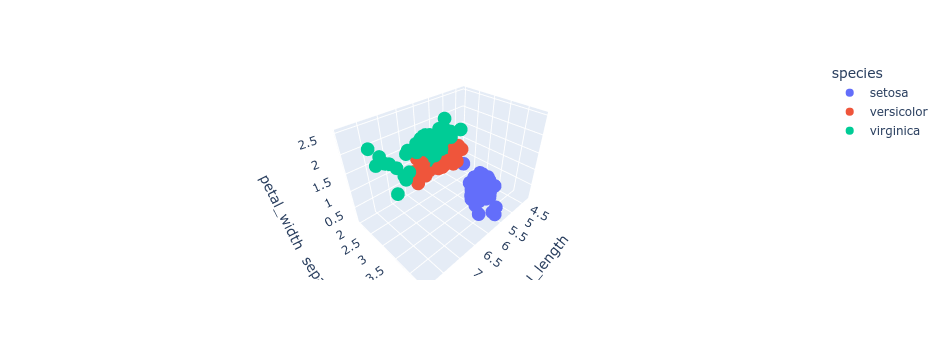